# Model training and validation

## Loss function

One of the key metrics to monitor while training a model is loss, which gets calculated during the forward pass for each batch of data. The diagram below illustrates how loss can change over time and what its pattern reveals about the learning rate:

| <img src="Images/loss.jpeg" height="450"> | <img src="Images/learningrates.jpeg" height="450"> | 

**Left** This shows how different learning rates affect loss. With a low learning rate, improvements tend to be slow and steady, following a linear pattern. On the other hand, a high learning rate speeds up the decay of the loss but often leads to unstable optimization, where the loss doesn’t reach a good minimum because the parameters "bounce" chaotically (as seen in the green line).

**Right** This graph demonstrates a typical loss curve over time. While this curve seems reasonable, its slow decay might suggest a learning rate that’s too low. Additionally, the noisy fluctuations in the loss could indicate that the batch size is too small.


### Log scale

<img src="Images/log_scale.jpeg" height="450">

When to Use Each Loss Scale?

Normal Scale (Linear)
* Use when loss values are within a narrow range (e.g., 0.1 to 0.001).
* Best for stable, non-exponential loss curves.
* Easier to interpret for small loss changes.

Log Scale
* Use when loss spans multiple orders of magnitude (e.g., 100 → 0.001).
* Helps visualize small improvements in later epochs.
* Useful when loss decreases exponentially.

## Train/Val accuracy

Another important metric to track is accuracy, particularly on both the training and validation datasets. This can provide insight into whether the model is overfitting.

![Acc](Images/accuracies.jpeg)

The plot on the left shows two scenarios. In one case, the validation accuracy is significantly lower than the training accuracy, indicating overfitting. When this happens, you might want to add stronger regularization (like increasing dropout or using an L2 penalty) or collect more training data.

In the second scenario, the validation and training accuracies are closely aligned, which suggests the model lacks sufficient complexity. To improve in this case, you should increase the model size by adding more parameters.

# Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data preprocessing

### Standardization (Z-score Normalization)

Standardization transforms the data to have a mean of zero and a standard deviation of one. It’s often used when the algorithm assumes the data is normally distributed. Formula:

$Z=\frac{X−μ}{σ}$
​	
where:
- X is the original value
- μ is the mean
- σ is the standard deviation

![z-score](Images/z-score.webp)

When to Use:
- Ideal for features that are normally distributed and when using algorithms that make assumptions about the distribution of your data, such as Linear Regression, Logistic Regression, and Support Vector Machines.

### Normalization (Min-Max Scaling)

Min-Max Normalization is a scaling technique that transforms features to a specific range, usually [0, 1]. Formula:

Formula:

$X=\frac{X-X_{min}}{X_{max}-X_{min}}$ 

![Min-max](Images/min-max.webp)

When to Use:
- When you want to preserve the relationships among the original data points but need them in a scaled format
- When you need to scale features to a bounded interval
- When algorithms require data in a fixed range, like neural networks
- Suitable for most continuous features without significant outliers, as min-max normalization is sensitive to them

## Aspect Ratio

The image demonstrates how aspect ratio affects the way data is visually represented.

![aspectratio](Images/aspect_ratio.png)

Why it matters
- **Prevents Misinterpretation**: Unequal aspect ratios can distort shapes, making circles look like ellipses.
- **Ensures Accuracy**: Essential in fields like science and mapping where proportions must be maintained.
- **Keeps Data Representation Clear**: Distortions can mislead analysis; equal aspect ratios preserve true relationships

## When to Connect Points in a Scatter Plot? 

Connect Points
* When data represents a continuous trend (e.g., time series, functions).
* When you want to show relationships between consecutive points.

Do Not Connect Points
* When data points are independent (e.g., survey responses, categorical data).
* When there is no natural order or progression between points.

<img src="Images/connect_plot.jpeg" height="450">

## How to Interpret Histograms

A histogram is a useful tool for visualizing the distribution of a dataset. It helps identify patterns, such as which values occur most frequently and how the data is spread. The x-axis represents the variable being measured, divided into bins (ranges of values), while the y-axis shows the count (or frequency) of observations in each bin.

Histograms are useful for understanding the shape of a data set:

![his_shape](Images/histogram_shape.png)

Knowing the shape of our data sets is important because it allows us to know how to further analyze our data.

In a symmetric distribution, the mean, median, and mode are equal, and the graph is balanced on both sides. When the distribution is right-skewed (positively skewed), the mean is pulled higher than the median and mode due to high values stretching the right tail. In a left-skewed (negatively skewed) distribution, the mean is lower than the median and mode because low values extend the left tail. The mean is most affected by extreme values, while the median and mode remain more stable.

![his_m_m](Images/histogram_mean_median.png)

Histograms can be used to quickly compare 2 data sets. Aligning the plots vertically helps us see this horizontal change when the axes are fixed and have the same limits:

![his_comp](Images/histogram_compare.png)

Histograms are useful to identify outliers in a data set:

![his_outli](Images/histogram_outliers.png)

The shape of a histogram can be affected by changing the bin widths:

![his_bin_w](Images/histogram_bins_widths.png)

## Visualizing distributions of data

**Read more**: [Visualizing distributions of data](https://seaborn.pydata.org/tutorial/distributions.html#tutorial-kde)

The bivariate KDE plot shows how two variables are related in terms of data density. This means we can visualize where most of the data points are concentrated.

### Example

The geyser dataset contains data on geyser eruptions, specifically waiting time (time between eruptions) and duration (length of eruption). The KDE plots help visualize how these two variables relate.

#### Standard Bivariate KDE Plot

![kde1](Images/KDE_1.png)

What we see:
* This plot shows the density distribution of waiting time vs. duration.
* Areas with more overlapping points are represented with denser contour lines.
* If the contours are elongated diagonally, it suggests a correlation between waiting time and eruption duration

#### Adding Hue for a Third Variable ("kind")

![kde2](Images/KDE_2.png)

What we see:
* This introduces hue (color coding) for the "kind" variable, separating different categories of eruptions.
* Each category has its own density contours, allowing us to see if certain eruption types have different distributions.
* Example: One category might have short eruptions with short waiting times, while another has longer eruptions after longer waits.

#### Filling the Contours for Better Visibility

![kde3](Images/KDE_3.png)

What we see:
* This version fills the density areas, making the differences between eruption types even clearer.
* Darker shades indicate higher density regions, meaning more eruptions occur in that range.
* Helps in spotting which type of eruption is more frequent.

## Time series visualization

In [ ]:
# reading the dataset using read_csv
df = pd.read_csv("data/stock_data.csv", 
                 parse_dates=True, 
                 index_col="Date")

# drop unnecessary column
df.drop(columns='Unnamed: 0', inplace =True)

# displaying the first five rows of dataset
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


### Line plot

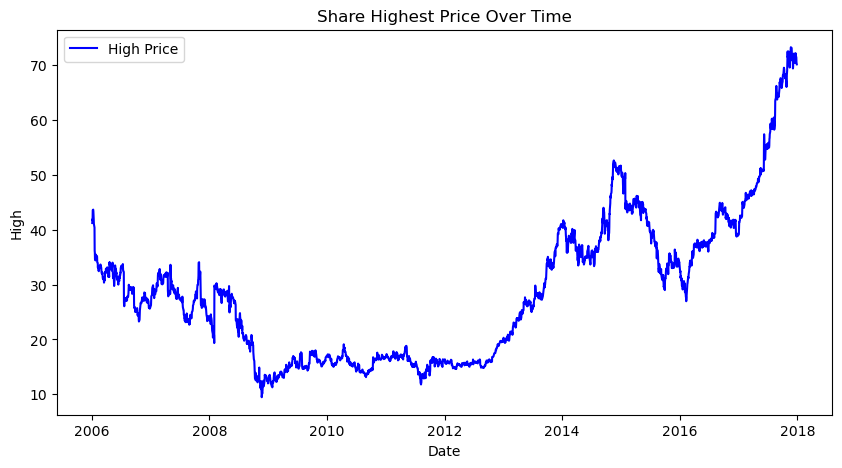

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Date', y='High', label='High Price', color='blue')

plt.xlabel('Date')
plt.ylabel('High')
plt.title('Share Highest Price Over Time')

plt.show()

### Counting

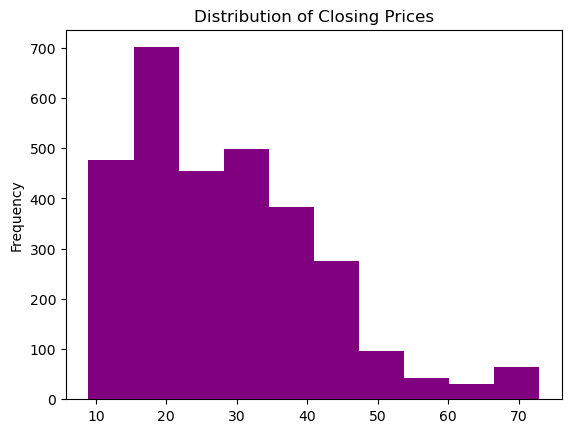

In [ ]:
df['Close'].plot(kind='hist', bins=10, title='Distribution of Closing Prices', color='purple')
plt.show()

### Resampling

To better understand the trend of the data we will use the resampling method, resampling the data on a monthly basis can provide a clearer view of trends and patterns, especially when we are dealing with daily data.

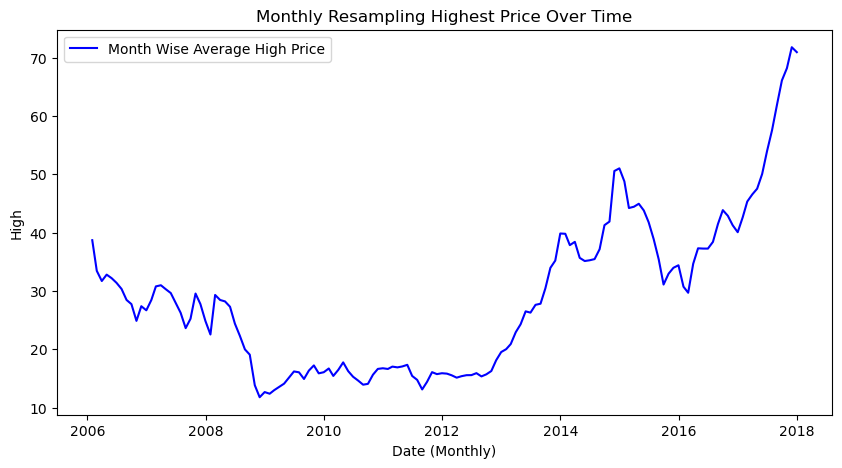

In [ ]:
# Assuming df is your DataFrame with a datetime index
df_resampled = df.resample('ME').mean(numeric_only=True)  # Resampling to monthly frequency, using mean as an aggregation function

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_resampled, x=df_resampled.index, y='High', label='Month Wise Average High Price', color='blue')

plt.xlabel('Date (Monthly)')
plt.ylabel('High')
plt.title('Monthly Resampling Highest Price Over Time')

plt.show()

### Smoothening

Differencing involves subtracting the previous observation from the current observation to remove trends or seasonality.

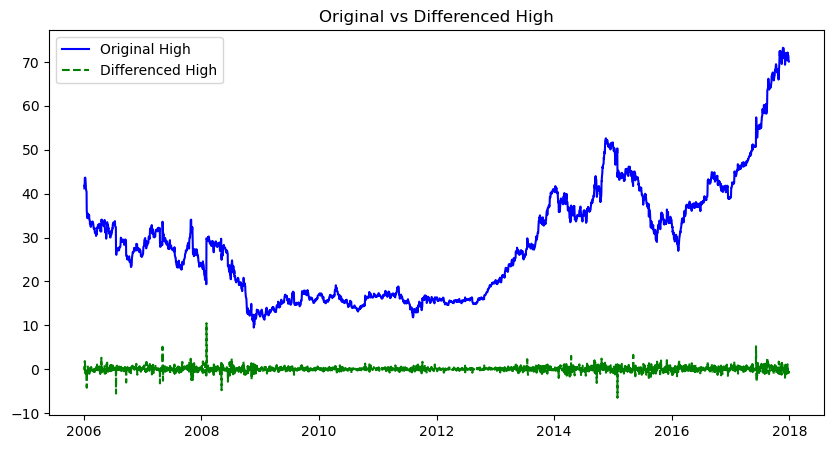

In [ ]:
df['high_diff'] = df['High'].diff()

plt.figure(figsize=(10, 5))
plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_diff'], label='Differenced High', linestyle='--', color='green')
plt.legend()
plt.title('Original vs Differenced High')
plt.show()

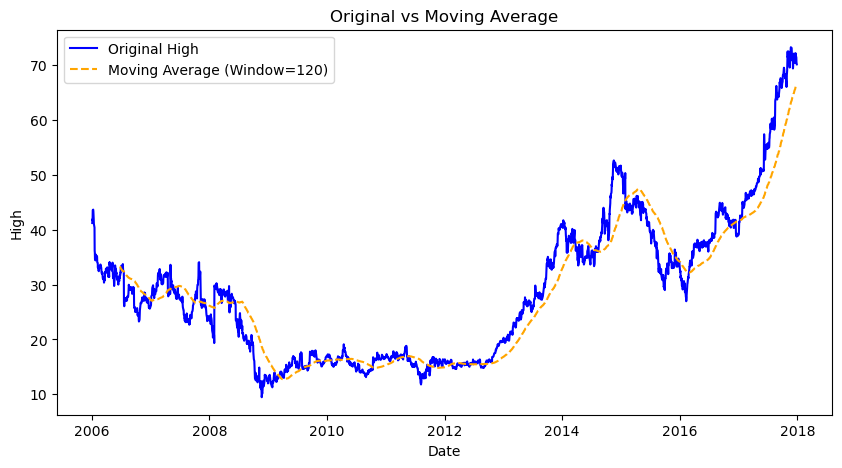

In [ ]:
window_size = 120
df['high_smoothed'] = df['High'].rolling(window=window_size).mean()

plt.figure(figsize=(10, 5))

plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_smoothed'], label=f'Moving Average (Window={window_size})', linestyle='--', color='orange')

plt.xlabel('Date')
plt.ylabel('High')
plt.title('Original vs Moving Average')
plt.legend()
plt.show()

This calculates the moving average of the ‘High’ column with a window size of 120(A quarter) , creating a smoother curve in the ‘high_smoothed’ series. The plot compares the original ‘High’ values with the smoothed version.

# Bibiography

[Convolutional Neural Networks for Visual Recognition](https://cs231n.github.io/neural-networks-3/)

[Dataset](https://github.com/Neelu-Tiwari/dataset/blob/main/stock_data.csv)

[Time Series Visualization](https://www.geeksforgeeks.org/time-series-data-visualization-in-python/)

[How to Interpret Histograms](https://www.labxchange.org/library/items/lb:LabXchange:10d3270e:html:1)

[Visualizing distributions of data](https://seaborn.pydata.org/tutorial/distributions.html#tutorial-kde)

[seaborn.kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

[16 Data Normalization Methods Using Python (With Examples)](https://medium.com/@reinapeh)